In [1]:
import sys
sys.path.append("gpib_instrument_control/")
import lmx2594
import gpib_instrument_control.hp_3478a
import gpib_instrument_control.pm_1038

meter = gpib_instrument_control.hp_3478a.Hp3478A()
pm = gpib_instrument_control.pm_1038.Pm1038(None, meter,  None, "pm11-0674_correctionFactors.mat")

lmx = lmx2594.Lmx2594('/dev/ttyUSB0', 320e6)

lmx.enableLockDetect(True)
print("Is locked?", lmx.isLocked())
print(pm.readChannelB(50e6))


Created LMX object wit fosc 320.0
Resetting LMX
Applying config
Is locked:  True
Is locked? True
59.660000000000004


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 10]

def powerSweep(frange):
    ampl = []
    lmx.setFrequency(frange[0])
    time.sleep(1)
    for f in frange:
        lmx.setFrequency(f)
        ampl.append(pm.readChannelB(f))
    return ampl

#frange = np.linspace(1e9, 15e9, 30)
#plt.plot(frange, ampl)


In [7]:
hardwareDescription='Added gapfiller and better connectors'
hardwareRevision='1.2'


def revFileName(baseName):
    global hardwareRevision
    return '%s_rev_%s.mat'%(baseName, hardwareRevision)

def saveData(baseName, baseData):
    global hardwareDescription
    global hardwareRevision
    dataToSave=baseData;
    dataToSave['hardwareDescription']=hardwareDescription
    sio.savemat(revFileName(baseName), dataToSave)

def loadData(baseName):
    global hardwareRevision
    return sio.loadmat(revFileName(baseName))

Text(0.5, 0, 'frequency [Hz]')

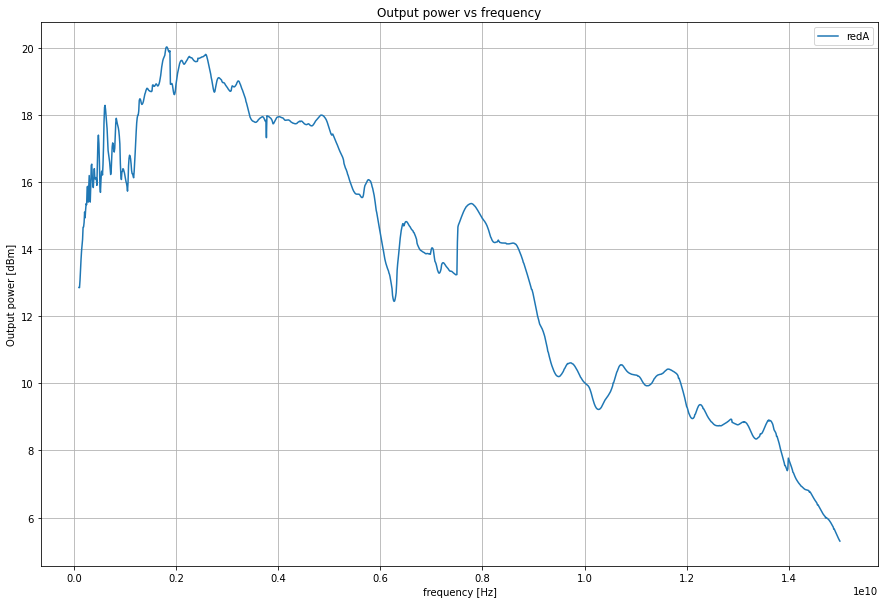

In [6]:
frange = np.linspace(100e6, 15e9, 1491)
amplRedA = powerSweep(frange)
plt.plot(frange, amplRedA, label='redA')
plt.grid(True)
plt.legend()
plt.title('Output power vs frequency')
plt.ylabel('Output power [dBm]')
plt.xlabel('frequency [Hz]')


Text(0.5, 0, 'frequency [Hz]')

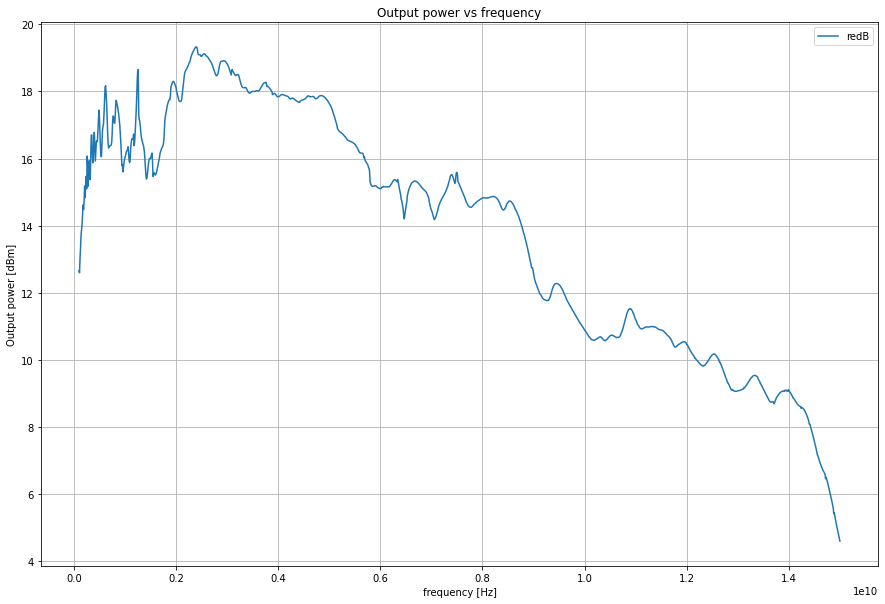

In [10]:
amplRedB = powerSweep(frange)
plt.plot(frange, amplRedB, label='redB')
plt.grid(True)
plt.legend()
plt.title('Output power vs frequency')
plt.ylabel('Output power [dBm]')
plt.xlabel('frequency [Hz]')


Text(0.5, 0, 'frequency [Hz]')

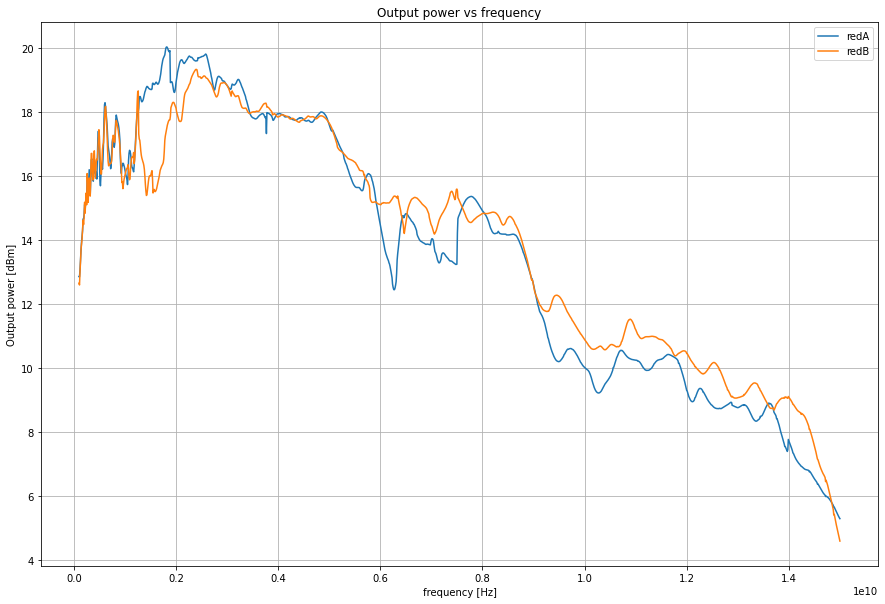

In [11]:
plt.plot(frange, amplRedA, label='redA')
plt.plot(frange, amplRedB, label='redB')
plt.grid(True)
plt.legend()
plt.title('Output power vs frequency')
plt.ylabel('Output power [dBm]')
plt.xlabel('frequency [Hz]')


Text(0.5, 0, 'frequency [Hz]')

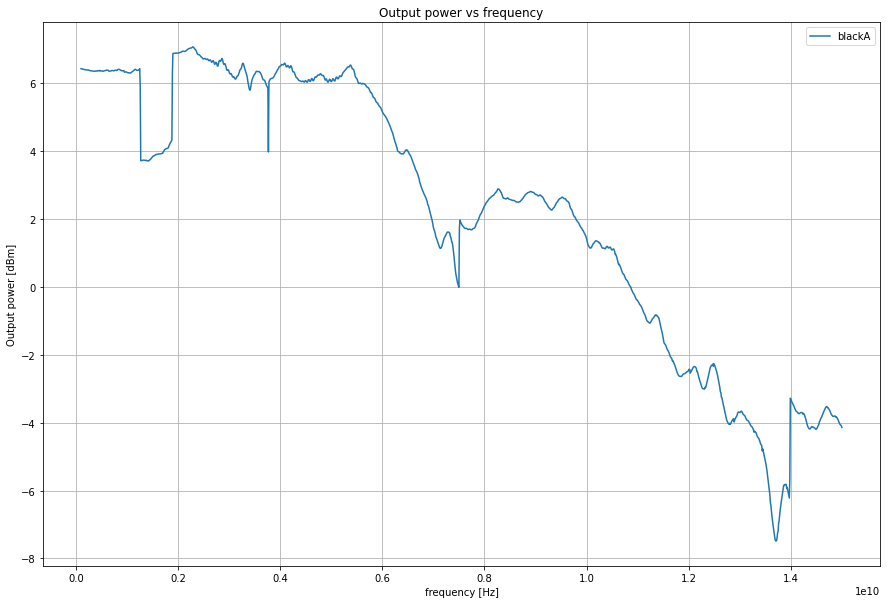

In [12]:
#frange = np.linspace(1e9, 15e9, 30)
amplBlackA = powerSweep(frange)
plt.plot(frange, amplBlackA, label='blackA')
plt.grid(True)
plt.legend()
plt.title('Output power vs frequency')
plt.ylabel('Output power [dBm]')
plt.xlabel('frequency [Hz]')


Text(0.5, 0, 'frequency [Hz]')

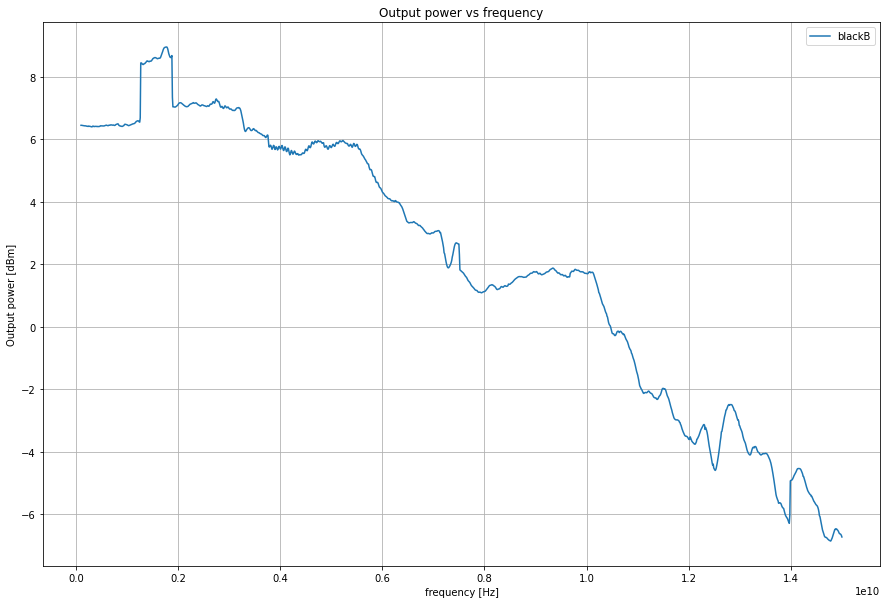

In [13]:
amplBlackB = powerSweep(frange)
plt.plot(frange, amplBlackB, label='blackB')
plt.grid(True)
plt.legend()
plt.title('Output power vs frequency')
plt.ylabel('Output power [dBm]')
plt.xlabel('frequency [Hz]')

Text(0.5, 0, 'frequency [Hz]')

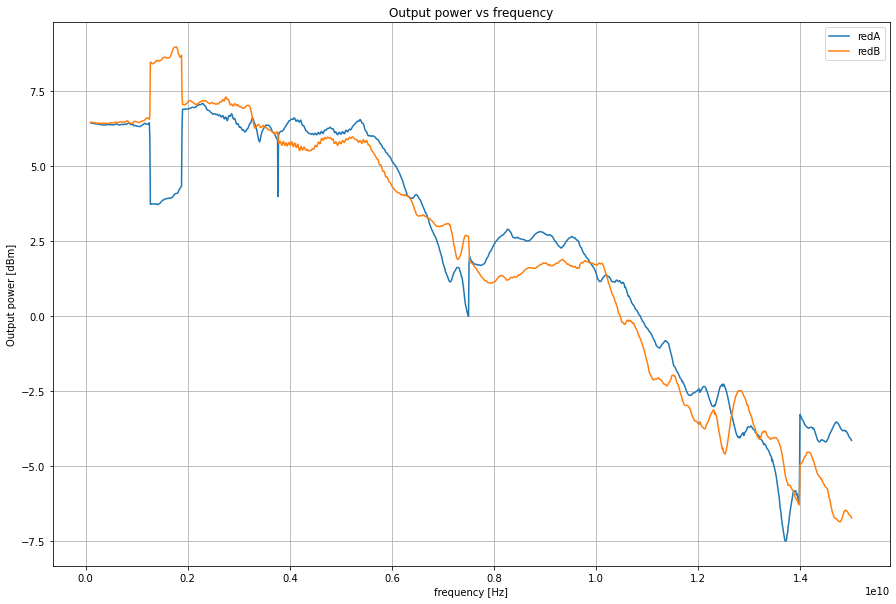

In [14]:
plt.plot(frange, amplBlackA, label='redA')
plt.plot(frange, amplBlackB, label='redB')
plt.grid(True)
plt.legend()
plt.title('Output power vs frequency')
plt.ylabel('Output power [dBm]')
plt.xlabel('frequency [Hz]')

In [15]:
import scipy.io as sio

sm = {'f':frange, 
           'redA': amplRedA, 
           'redB': amplRedB,
           'blackA': amplBlackA, 
           'blackB': amplBlackB,
          }

saveData('amplitude_data', sm)